In [1]:
# Packages imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil


In [3]:
# Calculating effect size based on our expected rates
effect_size = sms.proportion_effectsize(0.13, 0.15)

In [5]:
required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )   

In [8]:
required_n = ceil(required_n)
required_n

4720.0

In [10]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [12]:
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


In [13]:
session_counts = df['user_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()

In [15]:
multi_users

3894

In [16]:
users_to_drop = session_counts[session_counts > 1].index

In [18]:
df = df[~df['user_id'].isin(users_to_drop)]

In [19]:
df.shape

(286690, 5)

In [26]:
control_sample = df[df['group'] == 'control'].sample(n=int(required_n), random_state=22)
treatment_sample = df[df['group'] == 'treatment'].sample(n=int(required_n), random_state=22)

ab_test = pd.concat([control_sample, treatment_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)

In [27]:
ab_test

,user_id,timestamp,group,landing_page,converted
0,763854,2017-01-21 03:43:17.188315,control,old_page,0
1,690555,2017-01-18 06:38:13.079449,control,old_page,0
2,861520,2017-01-06 21:13:40.044766,control,old_page,0
3,630778,2017-01-05 16:42:36.995204,control,old_page,0
4,656634,2017-01-04 15:31:21.676130,control,old_page,0
5,846354,2017-01-12 17:34:33.014616,control,old_page,0
6,879802,2017-01-15 15:26:31.018326,control,old_page,0
7,860778,2017-01-12 00:49:32.771388,control,old_page,0
8,630816,2017-01-13 08:43:01.536244,control,old_page,0
9,889771,2017-01-03 00:55:02.444223,control,old_page,0


In [28]:
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9440 entries, 0 to 9439
Data columns (total 5 columns):
user_id         9440 non-null int64
timestamp       9440 non-null object
group           9440 non-null object
landing_page    9440 non-null object
converted       9440 non-null int64
dtypes: int64(2), object(3)
memory usage: 368.8+ KB


In [29]:
ab_test['group'].value_counts()

treatment    4720
control      4720
Name: group, dtype: int64

In [33]:
conversion_rates = ab_test.groupby('group')['converted']

conversion_rates.describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
control,4720.0,0.123305,0.328822,0.0,0.0,0.0,0.0,1.0
treatment,4720.0,0.125636,0.331473,0.0,0.0,0.0,0.0,1.0


C:\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1333: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


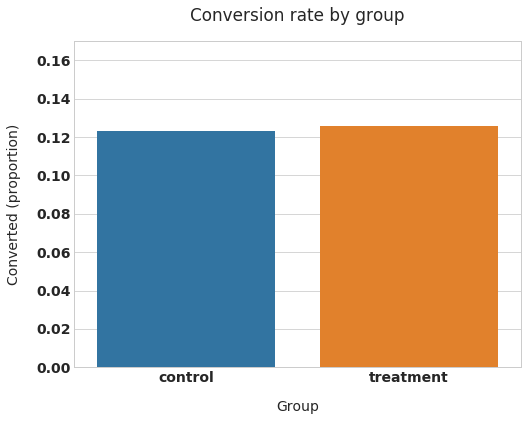

In [34]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test['group'], y=ab_test['converted'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);

In [47]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

control_results = ab_test[ab_test['group'] == 'control']['converted']
treatment_results = ab_test[ab_test['group'] == 'treatment']['converted']
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print('z statistic {}'.format(z_stat))
print('p-value: {}').format(pval)
print('ci 95% for control group: {}, {}'.format(lower_con,upper_con))
print('ci 95% for control group: {}, {}'.format(lower_treat,upper_treat))

z statistic -0.342955932739
p-value: 0.731631612347
ci 95% for control group: 0.113925322536, 0.132684846956
ci 95% for control group: 0.116180198265, 0.135090988175
